In [1]:
import numpy as np
import os

In [2]:
def func_file2seq(filepath):
    seq_list = []
    with open(filepath,'r') as f1:
        for line in f1:
            if line[0] == '>':
                continue
            else:
                seq = list(line.strip().replace('\n','').upper())
                seq_list.append(seq)
    return np.array(seq_list)

In [3]:
def super_matrix_update(seq):
    global freq_matrix_sup
    for col_in in range(seq.shape[1]):
        values,counts = np.unique(seq[:,col_in],return_counts=True)

        index = np.where(values == '-')

        values = np.delete(values,index)
        counts = np.delete(counts,index)

        if np.sum(counts)<2:
            continue
        else:
            for i in range(len(values)):
                for j in range(i,len(values)):
                    if j == i:
                        freq_matrix_sup[aa2index[values[i]],aa2index[values[j]]] += counts[i]*(counts[i]-1)*0.01
                    else:
                        freq_matrix_sup[aa2index[values[i]],aa2index[values[j]]] += counts[i]*counts[j]*0.01
                        freq_matrix_sup[aa2index[values[j]],aa2index[values[i]]] += counts[i]*counts[j]*0.01

In [4]:
def twil_matrix_update(seq):
    global freq_matrix_twil
    for col_in in range(seq.shape[1]):
        values,counts = np.unique(seq[:,col_in],return_counts=True)

        index = np.where(values == '-')

        values = np.delete(values,index)
        counts = np.delete(counts,index)

        if np.sum(counts)<2:
            continue
        else:
            for i in range(len(values)):
                for j in range(i,len(values)):
                    if j == i:
                        freq_matrix_twil[aa2index[values[i]],aa2index[values[j]]] += counts[i]*(counts[i]-1)*0.01
                    else:
                        freq_matrix_twil[aa2index[values[i]],aa2index[values[j]]] += counts[i]*counts[j]*0.01
                        freq_matrix_twil[aa2index[values[j]],aa2index[values[i]]] += counts[i]*counts[j]*0.01

In [5]:
one2all ={'A': ('A', 'ALA', 'alanine'),
              'R': ('R', 'ARG', 'arginine'),
              'N': ('N', 'ASN', 'asparagine'),
              'D': ('D', 'ASP', 'aspartic acid'),
              'C': ('C', 'CYS', 'cysteine'),
              'Q': ('Q', 'GLN', 'glutamine'),
              'E': ('E', 'GLU', 'glutamic acid'),
              'G': ('G', 'GLY', 'glycine'),
              'H': ('H', 'HIS', 'histidine'),
              'I': ('I', 'ILE', 'isoleucine'),
              'L': ('L', 'LEU', 'leucine'),
              'K': ('K', 'LYS', 'lysine'),
              'M': ('M', 'MET', 'methionine'),
              'F': ('F', 'PHE', 'phenylalanine'),
              'P': ('P', 'PRO', 'proline'),
              'S': ('S', 'SER', 'serine'),
              'T': ('T', 'THR', 'threonine'),
              'W': ('W', 'TRP', 'tryptophan'),
              'Y': ('Y', 'TYR', 'tyrosine'),
              'V': ('V', 'VAL', 'valine'),
              'X': ('X', 'GLX', 'glutaminx'),
              'Z': ('Z', 'GLI', 'glycine'),
              'J': ('J', 'NLE', 'norleucine'),
                'U': ('U', 'CYC', 'cysteinc')}

In [6]:
aa2index={}
for i, aa in enumerate(list(one2all.keys())):
    aa2index[aa] = i

In [7]:
super_directory ="/home/chingyuenliu/TTIC31160_bioinfo/hw2/Super"
twil_directory ="/home/chingyuenliu/TTIC31160_bioinfo/hw2/Twil"

In [8]:
freq_matrix_sup= np.zeros([len(one2all.keys()),len(one2all.keys())])
for root, dirs, files in os.walk(super_directory):
    for file in files:
        if file.endswith(".fasta") and file.startswith('d'):
            seq = func_file2seq(os.path.join(root,file))
            super_matrix_update(seq)

In [9]:
freq_matrix_twil= np.zeros([len(one2all.keys()),len(one2all.keys())])
for root, dirs, files in os.walk(twil_directory):
    for file in files:
        if file.endswith(".fasta") and file.startswith('d'):
            seq = func_file2seq(os.path.join(root,file))
            twil_matrix_update(seq)

In [10]:
freq_matrix_all = freq_matrix_sup + freq_matrix_twil

In [11]:
freq_matrix_list =[freq_matrix_sup,freq_matrix_twil,freq_matrix_all]

In [12]:
score_matrix_list = []

In [13]:
for matrix in freq_matrix_list:
    matrix = matrix[:20,:20]
    prob = matrix/np.sum(matrix)
    mar_p = np.sum(matrix,axis=1,keepdims=True)/np.sum(matrix)
    mar_p_pro = mar_p.dot(mar_p.T)+ 1e-9
    score_matrix = prob/mar_p_pro
    score_matrix = 2 * np.log2(score_matrix)
    score_matrix_list.append(score_matrix)

In [31]:
name_list = ["Super","Twilight","Combined"]

In [32]:
aa_name_array = np.array(list(one2all.keys())[:20]).reshape(1,-1)
for i in range(len(name_list)):
    score_matrix_test_test = score_matrix_list[i].round().astype(int).astype(str)
    test_matrix_test = np.zeros([21,21]).astype(str)
    test_matrix_test[0,1:]=aa_name_array
    test_matrix_test[1:,1:] = score_matrix_test_test
    test_matrix_test[1:,0] = aa_name_array
    np.savetxt(f"/home/chingyuenliu/TTIC31160_bioinfo/hw2/blosum_{name_list[i]}", test_matrix_test, fmt="%3s", delimiter=' ')

In [46]:
import matplotlib.pyplot as plt

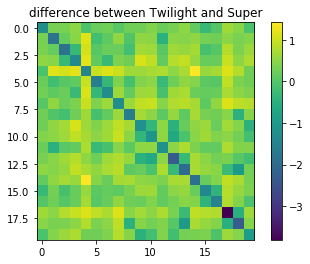

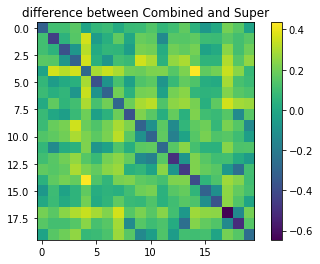

<Figure size 432x288 with 0 Axes>

In [68]:

for i in range(1,3):
    matrix= score_matrix_list[i]-score_matrix_list[0]
    plt.imshow(matrix)
    plt.colorbar()
    plt.title(f'difference between {name_list[i]} and Super')
    plt.show()

In [70]:
print(f"The difference between Twilight and Super family: {np.abs(score_matrix_list[1]-score_matrix_list[0]).sum()}")
print(f"The difference between Combined and Super family: {np.abs(score_matrix_list[2]-score_matrix_list[0]).sum()}")

The difference between Twilight and Super family: 219.07034454137545
The difference between Combined and Super family: 64.1296720872568


From the plot above, it is clearly the combined scoring matrix is in the middle between Superfamily scoring matrix and Twilight scoring matrix.(the colorbar scale is different) On the sum of substraction between two matrix, the sum between Twilight and Superfamily is higher, suggesting the difference between twilight and superfamily is higher. The twilight scoring matrix has lower values on the diagonal while have higher values for non-diagonal values. It makes sense as twilight dataset's sequences are less similar thus the probaility distribution is more diverged, therefore generate higher scores for non-match amino acids and lower scores for match amino acids. 

In [33]:
def blosum2mat(blosum_filepath):
    seq_list = []
    with open(blosum_filepath,'r') as f1:
        for line in f1:
            if line[0] == '#' or line[3] =='A':
                continue
            else:
                seq = list(map(float,line[1:].strip().replace('\n','').split()))
                seq_list.append(seq)
    return np.array(seq_list)[:20,:20]

In [34]:
blosum_name_list=[]
blosum_mat_list=[]
blosum_filepath = "/home/chingyuenliu/TTIC31160_bioinfo/hw2/"
directory = os.fsencode(blosum_filepath)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("BLOSUM"):
        blosum_name_list.append(filename)
        blosum_mat_list.append(blosum2mat(os.path.join(blosum_filepath,filename)))

In [ ]:
# blosum_name_list=[]
# blosum_mat_list=[]
# blosum_filepath = "/home/chingyuenliu/TTIC31160_bioinfo/hw2/"

# with os.scandir(blosum_filepath) as it:
#     for entry in it:
#         if entry.name.startswith('BLOSUM') and entry.is_file():
#             blosum_name_list.append(entry.name)
#             blosum_mat_list.append(blosum2mat(entry.path))

In [38]:
blosum_name_list

['BLOSUM45', 'BLOSUM50', 'BLOSUM62', 'BLOSUM80', 'BLOSUM90']

In [44]:
np.corrcoef(score_matrix_list[0].reshape(-1),blosum_mat_list[0].reshape(-1))

array([[1.        , 0.98101383],
       [0.98101383, 1.        ]])

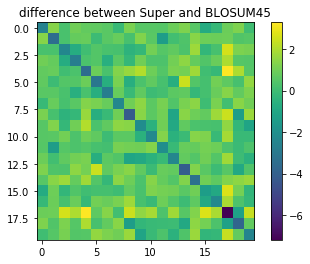

The difference between Super and BLOSUM45: 24.570232836410803
The correlation between Super and BLOSUM45: 0.9510304214394335


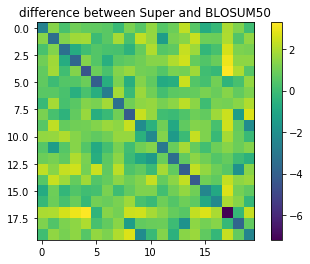

The difference between Super and BLOSUM50: 30.347625554940848
The correlation between Super and BLOSUM50: 0.9610745901541698


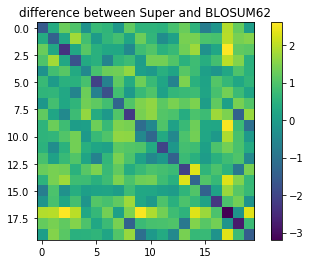

The difference between Super and BLOSUM62: 21.335490028423408
The correlation between Super and BLOSUM62: 0.9555343206390489


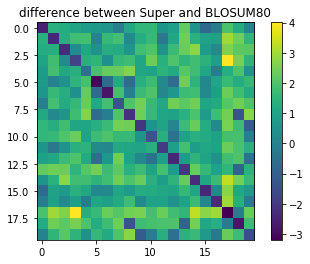

The difference between Super and BLOSUM80: 32.64509675054091
The correlation between Super and BLOSUM80: 0.9519586484834819


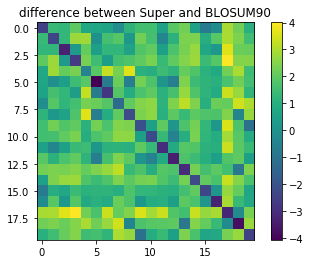

The difference between Super and BLOSUM90: 39.00003166851548
The correlation between Super and BLOSUM90: 0.9475414671478105


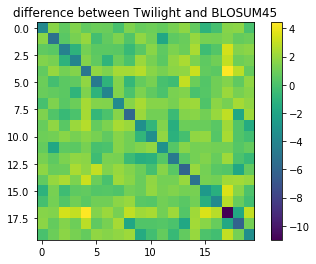

The difference between Twilight and BLOSUM45: 36.73198602554912
The correlation between Twilight and BLOSUM45: 0.8869561740587625


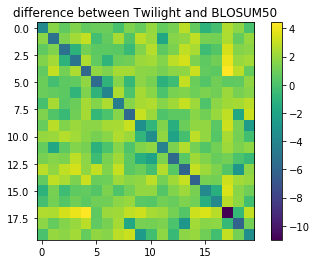

The difference between Twilight and BLOSUM50: 42.91460222287357
The correlation between Twilight and BLOSUM50: 0.9021720090058925


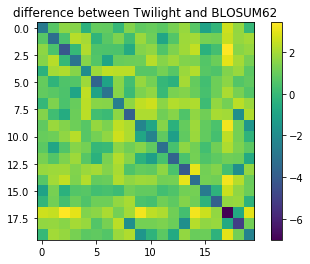

The difference between Twilight and BLOSUM62: 33.297050086986275
The correlation between Twilight and BLOSUM62: 0.8947086211051817


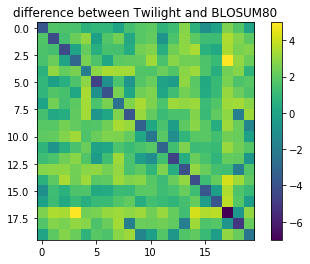

The difference between Twilight and BLOSUM80: 44.71542345233524
The correlation between Twilight and BLOSUM80: 0.8846067440045431


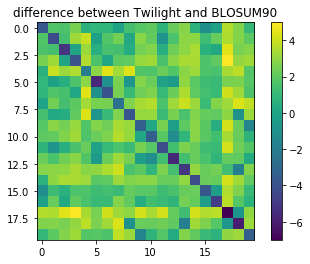

The difference between Twilight and BLOSUM90: 51.08515493469706
The correlation between Twilight and BLOSUM90: 0.8741247764313279


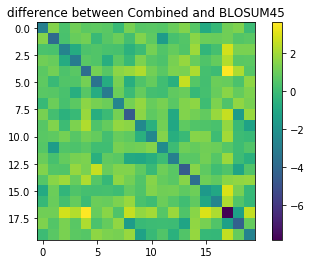

The difference between Combined and BLOSUM45: 27.748908211022417
The correlation between Combined and BLOSUM45: 0.9445999161990383


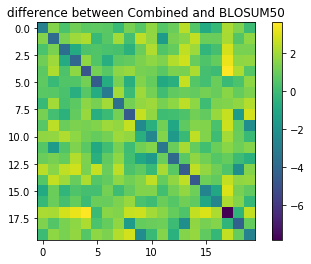

The difference between Combined and BLOSUM50: 33.75243453111935
The correlation between Combined and BLOSUM50: 0.9549298685315842


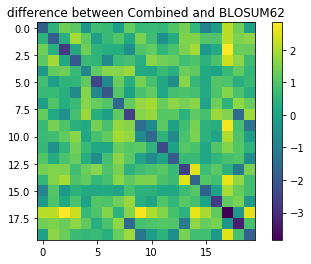

The difference between Combined and BLOSUM62: 24.56068169352527
The correlation between Combined and BLOSUM62: 0.9484608432506867


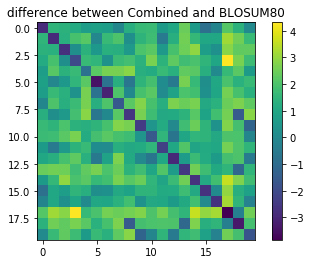

The difference between Combined and BLOSUM80: 36.03277714569984
The correlation between Combined and BLOSUM80: 0.9429525980690369


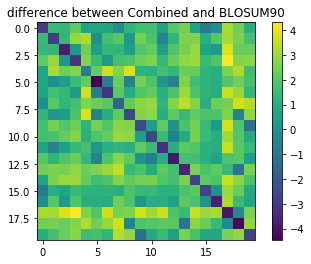

The difference between Combined and BLOSUM90: 42.41678580350386
The correlation between Combined and BLOSUM90: 0.9373621333369321


In [49]:
for m in range(len(score_matrix_list)):
    for b in range(len(blosum_mat_list)):
        matrix= score_matrix_list[m]-blosum_mat_list[b]
        plt.imshow(matrix)
        plt.colorbar()
        plt.title(f'difference between {name_list[m]} and {blosum_name_list[b]}')
        plt.show()
        print(f"The difference between {name_list[m]} and {blosum_name_list[b]}: {np.linalg.norm(matrix)}")
        corr = np.corrcoef(score_matrix_list[m].reshape(-1),blosum_mat_list[b].reshape(-1))
        print(f"The correlation between {name_list[m]} and {blosum_name_list[b]}: {corr[0,1]}")

In [100]:
difference_mat=np.zeros([3,5])
for m in range(len(score_matrix_list)):
    for b in range(len(blosum_mat_list)):
        matrix= score_matrix_list[m]-blosum_mat_list[b]
        difference_mat[m,b] =(np.abs(matrix)).sum()

In [107]:
scaled_difference_mat=difference_mat-np.min(difference_mat,axis=1,keepdims=True)
scaled_difference_mat

array([[ 19.70511951, 135.29390998,   0.        , 221.47897216,
        341.39625155],
       [ 14.95437087, 138.12405001,   0.        , 219.18653044,
        338.69145913],
       [ 17.37820697, 136.37565201,   0.        , 221.57786397,
        341.96594729]])

In [105]:
np.sum(freq_matrix_sup)

42620.91999999648

In [106]:
np.sum(freq_matrix_twil)

17509.060000000154

For Superfamily scoring matrix, the closest BLOSUM matrix with regard to the frobenius norm of the difference is BLOSUM62 with frobenius norm of 21.33; the closest BLOSUM matrix with regard to the correlation coefficient is BLOSUM50 with frobenius norm of 0.961; 
For Twilight scoring matrix, the closest BLOSUM matrix with regard to the frobenius norm of the difference is BLOSUM62 with frobenius norm of 33.30; the closest BLOSUM matrix with regard to the correlation coefficient is BLOSUM50 with frobenius norm of 0.902; 
For combined scoring matrix, the closest BLOSUM matrix with regard to the frobenius norm of the difference is BLOSUM62 with frobenius norm of 24.56; the closest BLOSUM matrix with regard to the correlation coefficient is BLOSUM50 with frobenius norm of 0.955; 

Given that all three scoring matrix's closest BLOSUM matrix is BLOSUM62 or BLOSUM50 based on different indicator, suggesting the three scoring matrix is not that different after all. It was expected once the difference is normalized by its minimum value(see matrix scaled_difference_mat), the Superfamily scoring matrix would have a lower difference on BLOSUM80 and BLOSUM90 than the Twilight scoring matrix have. However, it was the opposite from the data. Given that the difference is less than 3, suggesting there is not much difference between Superfamily scoring matrix and Twilight scoring matrix.

Additionally, as there are more entries in Superfamily(42620) than Twilight(17509), the combined scoring matrix is more similar towards Superfamily scoring matrix than Twilight scoring matrix.

In [108]:
file_path="/home/chingyuenliu/TTIC31160_bioinfo/hw2/Super_test/group1/d3sdha_.ent-d1la6a_.ent.fasta"
seq = func_file2seq(file_path)

In [135]:
# def score_calculate(seq,matrix_list):

#     score = np.zeros([len(matrix_list)])
#     for le in range(seq.shape[1]):
#         if not seq[0,le] in aa2index or not seq[1,le] in aa2index:
#             continue
#         elif aa2index[seq[0,le]] >19 or aa2index[seq[1,le]] >19:
#             continue
#         else:
#             for i in range(len(matrix_list)):
#                 score[i] += matrix_list[i][aa2index[seq[0,le]],aa2index[seq[1,le]]]
#     return score

In [140]:
def score_calculate_2(seq):

    score = np.zeros([len(score_matrix_list)])
    for le in range(seq.shape[1]):
        if not seq[0,le] in aa2index or not seq[1,le] in aa2index:
            continue
        elif aa2index[seq[0,le]] >19 or aa2index[seq[1,le]] >19:
            continue
        else:
            for i in range(len(score_matrix_list)):
                score[i] += score_matrix_list[i][aa2index[seq[0,le]],aa2index[seq[1,le]]]
    return score

In [151]:
super_score=[]
for root, dirs, files in os.walk(super_directory):
    for file in files:
        if file.endswith(".fasta") and file.startswith('d'):
            seq = func_file2seq(os.path.join(root,file))
            super_score.append(score_calculate_2(seq))


In [152]:
twil_score=[]
for root, dirs, files in os.walk(twil_directory):
    for file in files:
        if file.endswith(".fasta") and file.startswith('d'):
            seq = func_file2seq(os.path.join(root,file))
            twil_score.append(score_calculate_2(seq))


In [155]:
twil_score[0]

array([55.7080442 , 49.67252376, 55.77240053])

In [156]:
super_f_score = np.array(super_score)
twil_f_score = np.array(twil_score)

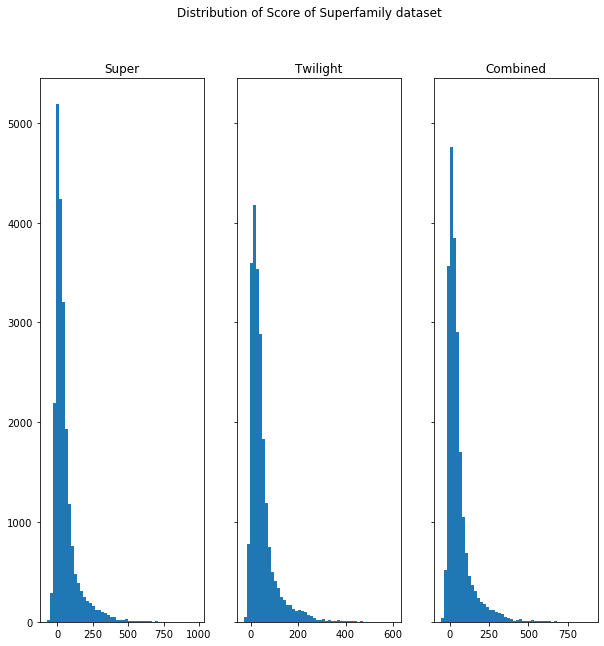

In [176]:
n_bins = 50
fig, axs = plt.subplots(1, 3, figsize=(10,10),sharey=True)
fig.suptitle('Distribution of Score of Superfamily dataset')
# We can set the number of bins with the `bins` kwarg
axs[0].hist(super_f_score[:,0], bins=n_bins)
axs[0].set_title("Super")
axs[1].hist(super_f_score[:,1], bins=n_bins)
axs[1].set_title("Twilight")
axs[2].hist(super_f_score[:,2], bins=n_bins)
axs[2].set_title("Combined")
plt.show()

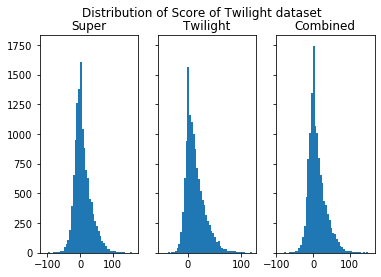

In [174]:
n_bins = 50
fig, axs = plt.subplots(1, 3, sharey=True)
fig.suptitle('Distribution of Score of Twilight dataset')
# We can set the number of bins with the `bins` kwarg
axs[0].hist(twil_f_score[:,0], bins=n_bins)
axs[0].set_title("Super")
axs[1].hist(twil_f_score[:,1], bins=n_bins)
axs[1].set_title("Twilight")
axs[2].hist(twil_f_score[:,2], bins=n_bins)
axs[2].set_title("Combined")
plt.show()

For both datasets, the score is higher with the scoring matrix generated from the same datasets. Superfamily dataset have higher score with the scoring matrix generated from Superfamily dataset and Twillight dataset have higher score with the scoring matrix generated from Twilight dataset. From the histograms ploted for superfamily dataset, most scores are positive, but still, the scores from twilight scoring matrix have more negative scores. The distributio for Twilight dataset is very obvious, the distribution for superfamily scoring matrix and Combined scoring matrix is more shifted towards the negative entry. 

One difference is that for Superfamily dataset, the span of the score is more different between Superfamily scoring matrix and Twilight scoring matrix. For superfamily scoring matrix, there are numerous scores over 600 but there are no scores over 60 from twilight scoring matrix. Essentially, the superfamily scoring matrix on Superfamily dataset produced more extreme high score and increased score variance. Comparing to the scores Twilight dataset produced from Superfamily scoring matrix and twilight scoring matrix, the span difference is not that different. And twilight scoring matrix have been consistently produce scores with lower variance. 